In [14]:
"""IMPORTING MODULES"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [15]:
"""READING DATAS"""
data=pd.read_csv("E:\datas\yahoo_finance_data.csv")

In [16]:
"""COLUMNS"""
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close**', 'Volume'], dtype='object')

In [17]:
"""INFORMATIONS"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1258 non-null   object
 1   Open         1258 non-null   int64 
 2   High         1258 non-null   int64 
 3   Low          1258 non-null   int64 
 4   Close        1258 non-null   int64 
 5   Adj Close**  1258 non-null   object
 6   Volume       1258 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 68.9+ KB


In [18]:
"""DESCRIBING DATAS"""
data.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,29595.828299,29776.953100,29402.426868,29599.357711,3.450636e+08
std,4006.085510,4009.022623,4004.951821,4007.472172,1.069142e+08
min,19028.000000,19121.000000,18214.000000,18592.000000,8.615000e+07
25%,26041.000000,26163.000000,25877.750000,26027.000000,2.773125e+08
50%,29201.500000,29335.500000,28996.500000,29199.500000,3.247250e+08
75%,33604.250000,33825.500000,33346.750000,33600.250000,3.875100e+08
max,36723.000000,36953.000000,36636.000000,36800.000000,9.159900e+08


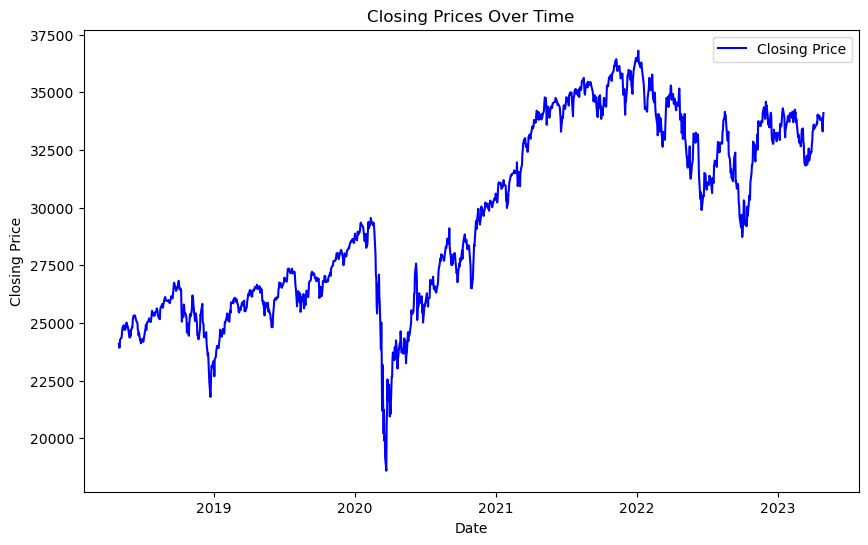

In [19]:
#Visualize Trends
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


           Date   Open   High    Low  Close Adj Close**     Volume  \
0    2023-04-28  33797  34105  33728  34098   34,098.16  354310000   
1    2023-04-27  33382  33860  33375  33826   33,826.16  343240000   
2    2023-04-26  33596  33646  33236  33302   33,301.87  321170000   
3    2023-04-25  33828  33875  33525  33531   33,530.83  297880000   
4    2023-04-24  33805  33891  33726  33875   33,875.40  252020000   
...         ...    ...    ...    ...    ...         ...        ...   
1253 2018-05-07  24318  24479  24263  24357   24,357.32  307670000   
1254 2018-05-04  23865  24333  23779  24263   24,262.51  329480000   
1255 2018-05-03  23836  23996  23531  23930   23,930.15  389240000   
1256 2018-05-02  24098  24186  23886  23925   23,924.98  385350000   
1257 2018-05-01  24117  24117  23808  24099   24,099.05  380070000   

               MA7  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1253  24633.

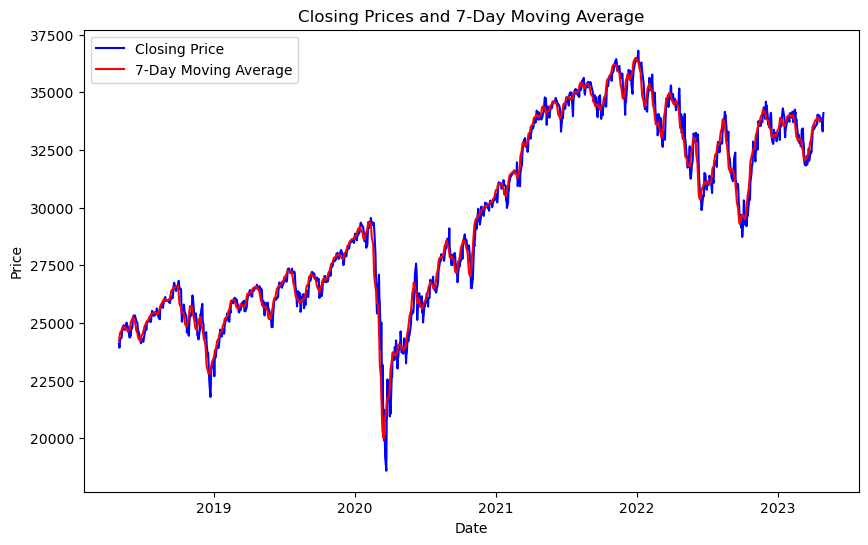

In [20]:

data['MA7'] = data['Close'].rolling(window=7).mean() # 7-day moving average
print(data)

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.plot(data['Date'], data['MA7'], label='7-Day Moving Average', color='red')
plt.title('Closing Prices and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


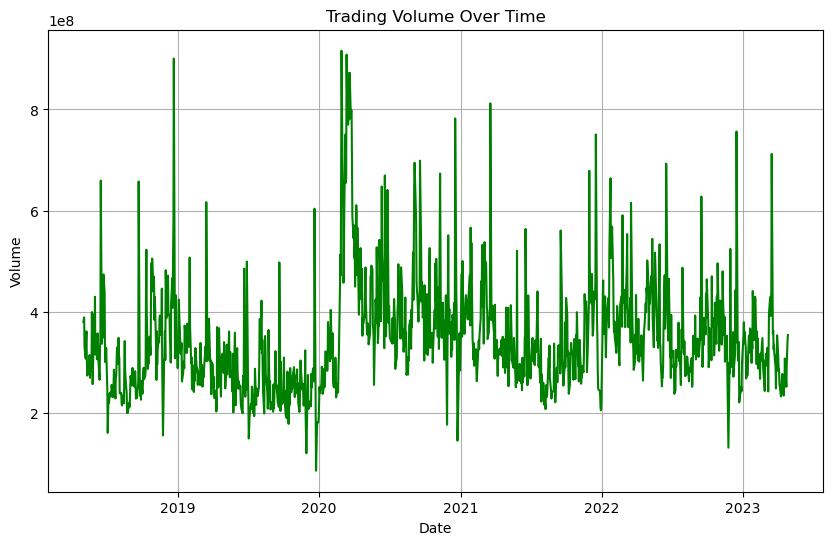

In [21]:


plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volume'], color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True) 
plt.show()


            Open      High       Low     Close    Volume
Open    1.000000  0.999043  0.998626  0.997592 -0.088002
High    0.999043  1.000000  0.998197  0.998682 -0.073386
Low     0.998626  0.998197  1.000000  0.998839 -0.115079
Close   0.997592  0.998682  0.998839  1.000000 -0.096765
Volume -0.088002 -0.073386 -0.115079 -0.096765  1.000000


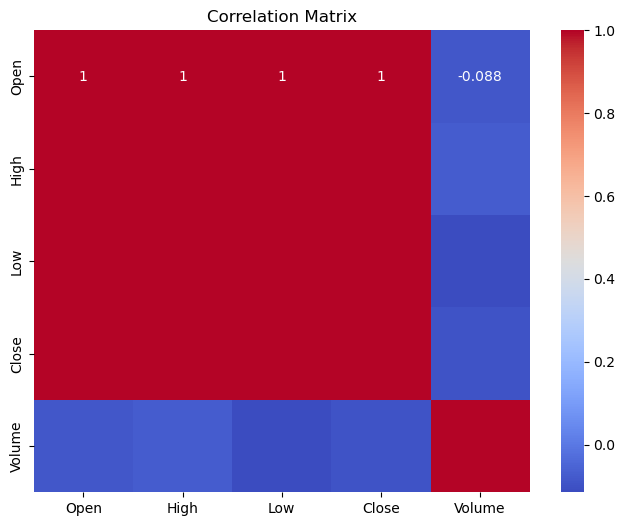

In [22]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [23]:

# Assuming the dataset is already loaded in a DataFrame named 'df'
data['Date'] = pd.to_datetime(data['Date'])

# Create Lag Features
data['Lag_Close_1'] = data['Close'].shift(1)  # Previous day's close
data['Lag_MA7_1'] = data['MA7'].shift(1)      # Previous day's 7-day moving average

# Rolling Statistics
data['Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()  # 7-day rolling mean
data['Rolling_Std_7'] = data['Close'].rolling(window=7).std()    # 7-day rolling standard deviation

# Drop any rows with NaN values that may result from the rolling calculations
data.dropna(inplace=True)

# Display the first few rows of the dataset to see the new features
print(data.head())


         Date   Open   High    Low  Close Adj Close**     Volume  \
7  2023-04-19  33890  33958  33815  33897   33,897.01  251490000   
8  2023-04-18  33965  34019  33792  33977   33,976.63  253570000   
9  2023-04-17  33930  33991  33797  33987   33,987.18  234530000   
10 2023-04-14  33982  34083  33731  33886   33,886.47  276720000   
11 2023-04-13  33669  34055  33605  34030   34,029.69  277230000   

             MA7  Lag_Close_1     Lag_MA7_1  Rolling_Mean_7  Rolling_Std_7  
7   33718.142857      33787.0  33746.857143    33718.142857     219.628799  
8   33739.714286      33897.0  33718.142857    33739.714286     238.585215  
9   33837.571429      33977.0  33739.714286    33837.571429     154.952527  
10  33888.285714      33987.0  33837.571429    33888.285714      75.737957  
11  33910.428571      33886.0  33888.285714    33910.428571      92.097516  


In [24]:
#train-test split
X = data[['Lag_Close_1', 'Lag_MA7_1', 'Rolling_Mean_7', 'Rolling_Std_7']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  


In [25]:

model = RandomForestRegressor(n_estimators=100, random_state=42)

RandomForestRegressor(random_state=42)


In [26]:

model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

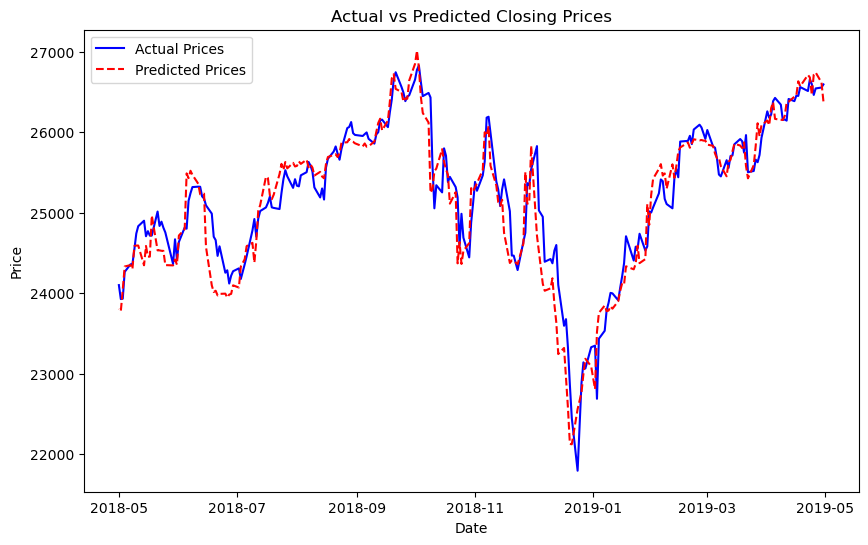

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


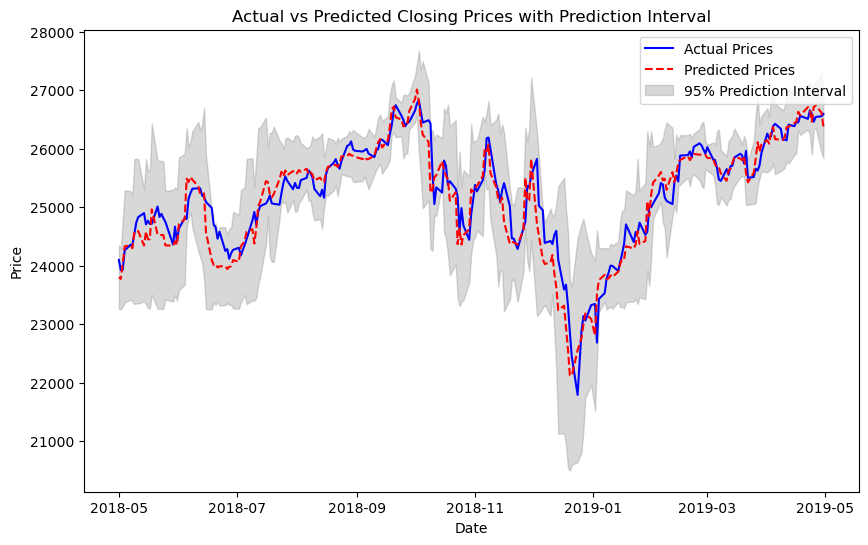

In [38]:


warnings.filterwarnings('ignore')

# Get predictions from each tree in the Random Forest
predictions = np.array([tree.predict(X_test) for tree in model.estimators_])

# Calculate the mean and standard deviation of the predictions
prediction_mean = predictions.mean(axis=0)
prediction_std = predictions.std(axis=0)

# Define the confidence interval (e.g., 95%)
lower_bound = prediction_mean - 1.96 * prediction_std
upper_bound = prediction_mean + 1.96 * prediction_std

# Plot actual vs predicted with prediction interval
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.fill_between(data['Date'].iloc[-len(y_test):], lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Prediction Interval')
plt.title('Actual vs Predicted Closing Prices with Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
